$\DeclareMathOperator{\lcm}{lcm}$
$\DeclareMathOperator{\ord}{ord}$
$\lcm$

In [4]:
from Crypto.Util.number import sieve_base, GCD, isPrime, long_to_bytes, bytes_to_long, inverse, getPrime

# Prerequisites

- None. This is where you start

# Theory

**Target**:
- Division
- GCD + XGCD + LCM
- Primes
- Euler totient function
- Integers modulo n
- Multiplicative group $\mathbb{Z}_n$
- Quadratic residues
- Legendre and Jacobi Symbols
- Carmichael numbers

## Setup

Let $\mathbb{Z} = \{...,−3,−2,−1,0,1,2,3,...\}$ denote the integers

# Number theory

## Division

**Division**:
- Let $a,b \in \mathbb{Z}$. Then $a$ divides $b$ (equivalently: $a$ is a divisor of $b$, or $a$ is a *factor* of $b$) if $\exists$ an integer $c$ such that $b=ac$.
- If $a$ divides $b$ => Notation: $a|b$

**Proprieties**
1. $a|a$.
2. If $a|b$ and $b|c$, then $a|c$
3. If $a|b$ and $a|c$, then $a|(bx+cy)\ \forall x,y∈\mathbb{Z}$
4. If $a|b$ and $b|a$, then $a=\pm b$

If $a$ and $b$ are integers with $b≥1$, then **ordinary long division** of $a$ by $b$ yields integers $q$ (**the quotient**) and $r$ (**the remainder**) such that 
- $\boxed{a=qb+r}$ where $0≤r<b$

Moreover,$q$ and $r$ are **unique**. 

The remainder of the division is denoted $a \ mod \ b$, and the quotient is denoted $a \ div \ b$

**Remark**: 
- Let $a,b∈\mathbb{Z}$ with $b \neq 0$. Then $a div b =\lfloor a/b \rfloor$ and $a \ \bmod \ b=a−b\lfloor a/b\rfloor$

## GCD and LCM

**Common divisors**
- An integer $c$ is a common divisor of $a$ and $b$ if $c|a$ and $c|b$

**Greatest common divisor**
- A non-negative integer $d$ is the **greatest common divisor** (GCD) of integers $a$ and $b$,if:
    - $d$ is a common divisor of $a$ and $b$
    - whenever $c|a$ and $c|b$, then $c|d$.

*Notation*: $\gcd(a,b)$

Equivalently, $\gcd(a,b)$ is the **largest** positive integer that divides both $a$ and $b$, with the exception that $\gcd(0,0)=0$

**Remark**: 
- if $r = a \ mod \ b => \boxed{\gcd(a, b) = \gcd(b, r)}$

**Algorithms**: 
- https://en.wikipedia.org/wiki/Euclidean_algorithm
- https://en.wikipedia.org/wiki/Extended_Euclidean_algorithm

In [40]:
a = 24
b = 15

In [41]:
def my_gcd(a, b):
    if a < b:
        a, b = b, a
    if b == 0:
        return a
    else:
        return my_gcd(b, a%b)

In [42]:
my_gcd(a, b), GCD(a,b)

(3, 3)

In [43]:
def my_xgcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        gcd, x, y = my_xgcd(b%a, a) #compute gcd first
        return (gcd, y - b//a *x , x)

In [44]:
g, u, v = xgcd(a, b)
print(g, u, v)
print(u * a + v * b)

3 2 -3
3


In [45]:
g, u, v = my_xgcd(a, b)
print(g, u, v)
print(u * a + v * b)

3 2 -3
3


**Least common multiple**
- A non-negative integer $d$ is the **Least common multiple** (LCM) of integers $a$ and $b$,if:
    - $a|d$ and $b|d$
    - whenever $a|d$ and $b|d$, then $d|c$.

*Notation*: $\text{lcm}(a,b)$

Equivalently, $\text{lcm}(a,b)$ is the **largest** positive integer that divides both $a$ and $b$, with the exception that $\lcm(0,0)=0$



**Remark**: If $a$ and $b$ are positive integers, then $\lcm(a,b)=\cfrac {a·b}  {\gcd(a,b)}$

## Primes

**Coprimes**
- Two integers $a$ and $b$ are said to be **relatively prime** or **coprime** if $\gcd(a,b)=1$

 **Primes**
- An integer $p≥2$ is said to be prime if its only positive divisors are $1$ and $p$.
    - Ex: $2, 3, 5, 7, 11, 13, 17...$
- Otherwise, $p$ is called composite

**Remarks**:
- If $p$ is prime and $p|ab$, then either $p|a$ or $p|b$ (or both)
- There are an infinite number of prime numbers

**Fundamental Theorem of Arithmetic**

If $n \geq 2$ then a can be factored as a product of prime number powers   
$ n=p_{1}^{e_{1}} \cdot p_{2}^{e_{2}} \cdot p_{3}^{e_{3}} \cdots p_{r}^{e_{r}} $  

The factorization is **unique**

https://en.wikipedia.org/wiki/Fundamental_theorem_of_arithmetic

**Finding prime numbers**
- https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes

**Prime number theorem**
- Let $\pi(x)$ denote the number of prime numbers $\leq x$. Then
$$\lim_{x \to \infty} \cfrac {\pi(x)} {x / ln x} = 1$$

*Intuition*: For large values of $x$, the number of primes is approximated by $\cfrac x {ln x}$

https://mathworld.wolfram.com/PrimeNumberTheorem.html

In [3]:
import numpy as np
n1 = 100000
n2 = 1000000

def expected_num_primes(x):
    return x/np.log(x)

print(f"Expected number of primes between {n1} and {n2} is {expected_num_primes(n2) - expected_num_primes(n1)}")

Expected number of primes between 100000 and 1000000 is 63696.52401247693


## Euler totient function

**Euler totient (phi) function**
- In number theory, Euler's totient function $\phi(n)$ counts the positive integers up to a given integer $n$ that are relatively prime to $n$.

**Proprieties**
- If $p$ is **prime** => $\boxed{\phi(p) = p-1}$
- Multiplicative => if $\gcd(m,n) = 1 => \phi(mn) = \phi(m)\cdot \phi(n)$ 
- If $ n=p_{1}^{e_{1}} \cdot p_{2}^{e_{2}} \cdot p_{3}^{e_{3}} \cdots p_{k}^{e_{k}} $  is the prime factorization of $n$ => $φ(n)=n\left( 1−\cfrac 1 {p_1} \right) \left(1−\cfrac 1{ p_2}\right)···\left(1−\cfrac 1 {p_k}\right)$

https://en.wikipedia.org/wiki/Euler%27s_totient_function

## Modular arithmetic

https://brilliant.org/wiki/modular-arithmetic/

**Def**
- If $a$ and $b$ are integers, then $a$ is said to be **congruent** to $b$ modulo $n$, written $a≡b \bmod \ n$, if $n$ divides $(a−b)$. 
- The integer $n$ is called the modulus of the congruence

**Def**
- The **integers modulo $n$**, denoted $\mathbb{Z}_n$, is the set of (equivalence classes of) integers ${0,1,2,...,n−1}$. Addition, subtraction, and multiplication in $\mathbb{Z}_n$ are performed modulo $n$

**Equivalence relations props**
- $x \equiv x \bmod n$
-$x \equiv y \bmod n$ and $y \equiv z \bmod n \Rightarrow x \equiv z \bmod n$
- $x\equiv y \bmod n \Rightarrow y \equiv x \bmod n$

**Addition props**:
- If $a+b = c$, then $a\pmod N+b\pmod N \equiv c \pmod N$. 
- If $a\equiv b\pmod N$, then $a+k \equiv b+k \pmod N$ for any integer $k$.
- If $a\equiv b\pmod N$ and $c\equiv d\pmod N$ , then $a+c \equiv b+d \pmod N$
- If $a \equiv b\pmod N$, then $-a \equiv -b\pmod N$

**Multiplication Props**:
- If $a \cdot b = c$, then $a\pmod N\cdot b\pmod N \equiv c \pmod{N}$
- If $a \equiv b \pmod{N}$, then $ka \equiv kb \pmod{N}$for any integer $k$.
- If $a \equiv b \pmod{N}$ and $c \equiv d \pmod{N}$, then $ac \equiv bd \pmod{N}$

**Exponentiation Props**:
- If $a\equiv b\pmod{N}$, then $a^k \equiv b^k \pmod{N}$ for any positive integer $k$.

**Multiplicative inverses**:
- The modular inverse of $a$ in the ring of integers modulo $N$ is an integer $x$ such that $ax \equiv 1 \pmod{N}$.
- an element $x$ has an inverse $\iff \gcd(x, N) = 1$

The extended Euclidean algorithm gives us an efficient computational method for computing $a^{-1} \bmod p$  
We simply solve the equation $a u+p v=1 \quad$  
in integers $u$ and $v$
and then $u=a^{-1}$ mod $p .$

    

We want to find the inverse $u$ of an arbitrary number $a<m$ in the product modulo $m$, therefore

$$a u=1 \textrm{ (mod m)}$$

Let's take the $gcd(a, m)=d$

$$a u=1+m y$$

for some $y$ to be found. Rearranging the previous equation.

$$a u-m y=1$$

We divide now $d$ to both sides of the previous equation. Since $d$ is a common factor for $a$ and $m$ we know that the left hand side is an integer, but the right hand side would be a real number, therefore $d$ has to be 1.

Therefore, **$a$ moudulo $m$ has an inverse in multiplication if and only if $\gcd(a,m)=1$**

We can use the extended euclidean algorithm to find the inverse modulo $m$ for an integer $a$. Since we know that gcd($a$, $m$)=1, we can write

$$au+mv=gcd(a,m)=1$$

This means that

$$au-1=-mv$$

And if we apply the modulo $m$ to both sides we get

$$au-1=0 \textrm{ (mod m)}$$

or

$$au=1 \textrm{ (mod m)}$$

and therefore $u$ is the inverse of $a$ in modulo $m$.

### Chinese remainder theorem

"We have a number of things, but we do not know exactly how many.  
If we count them by threes we have two left over.  
If we count them by fives we have three left over.  
If we count them by sevens we have two left over.  
How many things are there?"  
- Sunzi

Let $n∈N^∗$ be a positive integer, $a, b∈\mathbb{Z}$ two integers and $d= \gcd(a, n)$.  Show that if $d|b$, then the congruence $ax≡b \bmod n$ has exactly $d$ solutions $x_1, x_2, . . . , x_d$ in the set $\{0,1, . . . , n−1\}$.

Let $m_{1}, m_{2}, \ldots, m_{k}$ be a collection of pairwise relatively prime integers. This means that  
$
\operatorname{gcd}\left(m_{i}, m_{j}\right)=1 \quad \text { for all } i \neq j
$  

Let $a_{1}, a_{2}, \ldots, a_{k}$ be arbitrary integers. 

Then the system of simultaneous congruences  
$  
x \equiv a_{1}\left(\bmod m_{1}\right), \\
x \equiv a_{2}\left(\bmod m_{2}\right), \\
\ldots\\
x \equiv a_{k}\left(\bmod m_{k}\right)
$  
has a solution $x=c .$  

Further, if $x=c$ and $x=c^{\prime}$ are both solutions, then
$
c \equiv c^{\prime} \quad\left(\bmod m_{1} m_{2} \cdots m_{k}\right)
$

Explanation: 
- https://www.youtube.com/watch?v=aS57JCzJw_o
- https://www.youtube.com/watch?v=oKMYNKbFHBE

**Remark**: If $\gcd(n_1,n_2)=1$, then the pair of congruences $x≡a\bmod {n_1} ,x≡a\bmod {n_2}$ has a unique solution $x≡a\bmod {n_1\cdot n_2}$

In [5]:
def solve_simple_eq(a, b, c, p):
    '''
    a + bx = c mod p
    x = (c - a) * b^{-1} mod p
    '''
    c = c-a
    c = (c * inverse(b, p)) % p
    return c%p

def crt(a_list, m_list):
    x = 0
    #starting values
    a = 0
    m = 1
    for i in range(len(m_list)):
        #general solution for the first equations x = a + m * y 
        #plug it in into the next equation and solve
        x = solve_simple_eq(a, m, a_list[i], m_list[i])
        
        a = a + m * x
        m = m * m_list[i]
        #print(a, m)        
    return a, m
        

In [14]:
a_list = [2, 3, 2]
m_list = [3, 5, 7]
crt(a_list=a_list, m_list=m_list)

(23, 105)

In [21]:
a_list = [5, 5]
m_list = [7, 13]
crt(a_list=a_list, m_list=m_list)

(5, 91)

# Abstract algebra

## Group

Let $G$ be a set with the $\cdot$ operation. Then $(G, \cdot)$ is a group $\iff$
1. **Closure**:  $a, b \in G \Rightarrow ab \in G$ 
2. **Assiociativity**: $a, b, c \in G \Rightarrow (ab)c = a(bc)$ 
3. **Identity**: $\exists \ e \in G \ s.t \ ae = ea = e, \ \forall \ a \in G$ 
4. **Inverses**: $\forall \ a \in G \ \exists a' \in G \ s.t. \ aa' = a'a = e$ 

## Additive group $\mathbb{Z}_n$

Recall that for a fixed $m$ all the possible values are

let $G = \{0, 1, 2, ..., m-1\} = \mathbb{Z}_n$

The elements with the modulo sum operation constitutes an **algebraic group** denoted as: ($G$, $+$). An algebraic group has the following properties:


* **Closure**: for any $a$ and $b$ in the set, the operation $a + b$ must also be in the set.
* **Associativity** for any $a$, $b$ and $c$ in the set, $(a + b)+ c = a + (b + c)$
* **Existence of identity**: There exist an element $e$ in the set such that for any $a$ in the set $a + e = a$
* **Inverse Element**: For any element in the group $a$ there must be another element $b$ such that $a + b = e$

If additionally the operation is commutative ($a+b$=$b+a$) then we say that the group is commutative or abelian.

## Multiplicative group $\mathbb{Z}_n$

**Definition**
- The multiplicative group of $\mathbb{Z}_n$ is $\mathbb{Z}^∗_n=\{a∈\mathbb{Z}n|\gcd(a,n)=1\}$.
- Inparticular, if $n$ is a prime, then $\mathbb{Z}^∗_n=\{a|1≤a≤n−1\}$

**Def order**
- The **order**of $\mathbb{Z}^∗_n$ is defined to be the number of elements in $\mathbb{Z}^∗_n$, namely $\boxed{|\mathbb{Z}^∗_n| = \phi(n)}$

### Euler's theorem
https://en.wikipedia.org/wiki/Euler%27s_theorem
Let $n≥2$ be an integer:
- (Euler’s theorem) If $a∈\mathbb{Z}^∗_n => φ(n)≡1 \bmod n$.

- If $n$ is a product of distinct primes, and if $r≡s \bmod φ(n) => a^r≡a^s \bmod n \ \forall a \in \mathbb{Z}$.  
    - *Intuition*: when working modulo such an $n$, exponents can be reduced modulo $φ(n)$.
    
### Fermat's little theorem
Let $p$ be a prime.
- (Fermat’s theorem) If $\boxed{\gcd(a,p)=1 \Rightarrow a^{p−1}≡1 \bmod p}$.
- If $r≡s \bmod {p−1}, \Rightarrow a^r≡a^s \bmod p \ \forall a \in \mathbb{Z}$ 
    - *Intuition*: when working modulo a prime $p$, exponents can be reduced modulo $p−1$
- In particular, $ap \equiv a \bmod p$ for all integers

In [4]:
p = getPrime(512)
a = 1234
print(pow(a, p-1, p))

r = pow(2, 16) + 1
s = 20 * (p-1) + r
# Check r = s mod (p - 1)
print(s % (p-1) == r % (p-1))
# a^s = a^r mod p
print(pow(a, s, p) == pow(a, r, p))

1
True
True


### Cyclic groups

A special case of group is the cyclic group. We say that a group is cyclic if it is possible to generate all the elements of the group, by taking one element and sucessively apply the operation. We call such element the **generator** of the group and is commonly denoted by $g$.

$$G = \{g^0, g^1, ..., g^{m-1}\}$$

where $m$ is the number of elements of the group, also known as the **order** of the group.

### Generators and the order of elements
- Let $a∈\mathbb{Z}^∗_n$. The **order** of $a$, denoted $\ord(a)$, is the least positive integer $t$ such that $a^t≡1 \bmod n$
- if $t = \phi(n) \Rightarrow a =$ generator

**Proprieties**
- $\mathbb{Z}^∗_n$ has a generator if and only if $n=2,4,p^k, 2p^k$, where $p$ is an odd prime and $k≥1$
    - In particular, if $p$ is a prime, then $\mathbb{Z}^∗_p$ has a generator
- If $g$ is a generator of $\mathbb{Z}^∗_n => \mathbb{Z}^∗_n =\{ g^i \bmod n|0≤i≤φ(n)−1\}$
- Suppose that $g$ is a generator of $\mathbb{Z}^∗_n => b= g^i \bmod n$ is also a generator of $\mathbb{Z}^∗_n$ if and only if $\gcd(i,φ(n)) = 1$
    - It follows that if $\mathbb{Z}^∗_n$ is cyclic, then the number ofgenerators is φ(φ(n)).
- $g∈\mathbb{Z}^∗_n$ is a generator of $\mathbb{Z}^∗_n \iff g^{φ(n)/p}\not ≡ 1 \bmod n$ for each prime divisor $p$ of $φ(n)$.

## Roots in $\mathbb{Z}_p$

Let 
- $p$ be a prime
- $a \in \mathbb{Z}_p$
> If $\gcd(e, p-1) = 1 \Rightarrow \exists d \equiv e^{-1} \bmod {p-1} \Rightarrow a^{e^{-1}} \equiv a^d \bmod p$

**Proof**
- $de\equiv 1 \bmod \mathbb{Z}_{p-1} \rightarrow \exists k \in \mathbb{Z}\  \text{such that }   de = k(p-1) + 1 \Rightarrow c^{de} \equiv c^{k(p-1)+1}\equiv \underbrace{c^{k(p-1)}}_1 \cdot c \equiv 1 \bmod p$

### Computing square roots

Let 
- $p$ be a prime

> $\text{If } p \equiv 3 \bmod 4 \Rightarrow \boxed{\sqrt{a} \equiv c^{\frac {p+1} 4} \bmod p}$

**Proof**
- $p+1 \equiv 0 \bmod 4$
- $c^{\left(\frac {p+1} 4\right)^2} \equiv c^{\frac {p+1} 2} \equiv c^{\frac {p-1} 2} \cdot c \equiv 1 \cdot c \equiv c \bmod p$

> $\text{If }p\equiv 1 \bmod 4 \Rightarrow$ we need a randomize algorithm => Tonelli shanks https://en.wikipedia.org/wiki/Tonelli%E2%80%93Shanks_algorithm

## Quadratic residues

- https://brilliant.org/wiki/quadratic-residues/
- https://en.wikipedia.org/wiki/Quadratic_residue

**Definition**

Let $a∈\mathbb{Z}^*_n$. 
- If $a$ and $n$ are coprime integers, then $a$ is called a **quadratic residue** modulo $n$ if the congruence $x^2\equiv a\bmod n$ has a solution.
- Likewise, if it has no solution, then it is called a quadratic non-residue modulo $n$.
- $x$ is called a **square root**

**Remarks**
- the set of all quadratic residues modulonis denotedby $Q_n$ and the set of all quadratic non-residues is denoted by $\overline{Q}_n$. Note that by definition $0\not ∈\mathbb{Z}^*_n$, whence $0\not ∈Q_n$ and $0\not ∈\overline{Q}_n$
- let $p$ be a prime => $|Q_p|=\dfrac{p−1} 2$ and $|\overline{Q}_p|= \dfrac {p−1} 2$ -> **Number of Q/NQ residues**
- $n = p \cdot q \Rightarrow$
    - $|Q_n|=|Q_p| \cdot |Q_q| = \dfrac {p−1} 4$ 
    - $|\overline{Q}_n|= \dfrac {3(p−1)} 4$
- if $p$ is prime and $a \in Q_p$ => $a$ has exactly 2 square roots
    - More generally, let $n=p^{e_1}_1p^{e_2}_2···p^{e_k}_k$ where the $p_i$ are distinct odd primes and $e_i≥1$. If $a∈Q_n$, => $a$ has precisely $2^k$ distinct square roots modulo $n$.

**Prop**  
Let $p$ be an odd prime number.
* QR·QR=QR mod p
* QR·NR=NR mod p
* NR·NR=QR mod p

## Legendre and jacobi symbols

### Legendre symbol

- https://brilliant.org/wiki/legendre-symbol/

*Idea*
- Check if a number is a QR or not

Let $p$ be an odd prime and let $a$ be an integer. The **Legendre symbol** of $a$ with respect to $p$ is defined by

$\left(\dfrac{a}{p}\right)=\begin{cases}1 & \text{ if } a \text{ is a quadratic residue modulo } p \text{ and } a \not\equiv 0\pmod{p}\\-1 & \text{ if } a \text{ is a quadratic non-residue modulo } p\\0 & \text{ if } a \equiv 0 \pmod{p}.\end{cases}$

**Proprieties**

- (Euler's criterion) If $p$ is an odd prime and $a$ is an integer not divisible by $p$, then
$a^{\frac{p-1}{2}}=\left(\dfrac{a}{p}\right)\pmod p$.
- If $a\equiv b \pmod p =>  \left(\dfrac{a}{p}\right)=\left(\dfrac{b}{p}\right)$
- $\left(\dfrac{ab}{p}\right)=\left(\dfrac{a}{p}\right)\left(\dfrac{b}{p}\right)$ that is, the function $f(a) = \left(\dfrac{a}{p} \right)$ is a completely multiplicative function.
- $\left(\dfrac{-1}{p}\right) = (-1)^{\frac{p-1}{2}}$ so it is $1$ if and only if $p \equiv 1 \bmod 4$.


- $\left(\dfrac{2}{p}\right)= (-1)^{\frac{p^2-1}{8}}$ for an odd prime $p$, so it is $1 \iff p \equiv \pm 1 \bmod 8$
- (The law of quadratic reciprocity) If $p$ and $q$ are distinct odd primes, we have
$\left(\dfrac{q}{p}\right)\left(\dfrac{p}{q}\right)=(-1)^{\frac{p-1}{2} \frac{q-1}{2}}$

### Jacobi Symbol

https://brilliant.org/wiki/jacobi-symbol/

If $n = p_1^{a_1}p_2^{a_2} \cdots p_k^{a_k}$
$$\left( \frac{a}{n} \right) = \left( \frac{a}{p_1} \right)^{a_1} \left( \frac{a}{p_2} \right)^{a_2} \cdots \left( \frac{a}{p_k} \right)^{a_k}$$

- The Legendre symbol measures whether $a$ is a square mod $p$. Unfortunately, the Jacobi symbol does not retain this property. it is indeed true that if $a∈Q_n$,then $\left(\dfrac a n\right)=1$. However,$\left(\dfrac a n\right)=1$ **does not** imply that $a∈Q_n$
- If $\text{gcd}(a,n) = 1$ and $a$ is a square mod $n$, where $n$ is an odd positive integer, then $\left( \frac{a}{n} \right) = 1$; but the converse is not true.
 
 **Proprieties**
 
Let $m,n$ be positive odd integers and let $a,b$be integers.

- If $a\equiv b \pmod n$, then $\left(\dfrac{a}{n}\right)=\left(\dfrac{b}{n}\right)$
- $\left(\dfrac{ab}{n}\right)=\left(\dfrac{a}{n}\right)\left(\dfrac{b}{n}\right)$ that is, the function $f(a) = \left(\dfrac{a}{n} \right)$ is a completely multiplicative function.
- $\left(\dfrac{a}{mn} \right) = \left(\dfrac{a}{m}\right) \left(\dfrac{a}{n}\right)$.
- $\left(\dfrac{-1}{n}\right) = (-1)^{\frac{n-1}{2}}$, so it is 11 if and only if $n \equiv 1 \bmod 4$.
- $\left(\dfrac{2}{n}\right)= (-1)^{\frac{n^2-1}{8}}$, so it is $1$ if and only if $n \equiv \pm 1 \bmod 8$.
- (Extension of the law of quadratic reciprocity:) If $m$ and $n$ are coprime positive odd integers,
$\left(\dfrac{m}{n}\right)\left(\dfrac{n}{m}\right)=(-1)^{\frac{m-1}{2} \frac{n-1}{2}}$

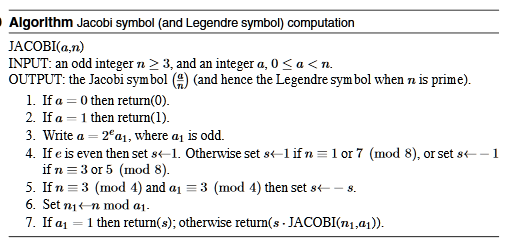

In [1]:
def jacobi_symbol(a, n):
    if a ==0:
        return 0
    if a ==1:
        return 1
    #write a = 2^e *s where a1 is odd
    e =0
    a1 = a
    while a1 & 1==0: #while a1 is even
        a1>>=1
        e+=1
        
    #if e is even set s = 1
    if e & 1 == 0:
        s = 1
    elif n % 8 == 7 or n % 8 == 1:
        s = 1
    elif n % 8 == 3 or n % 8 == 5:
        s = -1
    
    if n % 4 == 3 and a1 % 4 == 3:
        s = -s
        
    n1 = n % a1
    if a1 ==1:
        return s
    else:
        return s * jacobi_symbol(n1, a1)

In [2]:
jacobi_symbol(158, 235)

-1

## Carmichael numbers

- https://en.wikipedia.org/wiki/Carmichael_number

**Definition**
A Carmichael number $n$ is a composite integer such that $a^{n−1}≡1 \bmod n$ for all integers $a$ which satisfy $\gcd(a,n)=1$

**Necessary and sufficient conditions for Carmichael numbers (Korselt's Criterion)**: A composite integer $n$ is a Carmichael number if and only if the following two conditions are satisfied:
- $n$ is square-free, i.e., $n$ is not divisible by the square of any prime; 
- $p−1$ divides $n−1$ for every prime divisor $p$ of $n$

**Remark**:
- Every Carmichael number is the product of at least three distinct primes


### Carmichael function

- https://brilliant.org/wiki/carmichaels-lambda-function/

**Definition**

Let $n$ be a positive integer. Then  $\lambda(n)$ is defined to be the smallest positive integer $k$ such that 
- $a^k \equiv 1 \pmod n$ for all $a$ such that $\text{gcd}(a,n)=1$

**Computing**

 We have

$\begin{aligned} \lambda\left(p^{\alpha}\right) &= \begin{cases} \phi\left(p^{\alpha}\right) &\text{ if } \alpha \leq 2 \text{ or } p \geq 3 \\ \frac{1}{2} \phi\left(p^{\alpha}\right) &\text{ if } \alpha \geq 3 \text{ and } p = 2 \end{cases} \\\\ \lambda\left( {p_1}^{\alpha_1} \cdots {p_k}^{\alpha_k} \right) &= \text{lcm} \, \big(\lambda\left({p_1}^{\alpha_1}\right), \cdots, \lambda\left({p_k}^{\alpha_k}\right)\big), \end{aligned}$

where the pi p_i pi​ are distinct positive prime numbers. 

**Proprieties**
- If $a|b$, then $\lambda(a)|\lambda(b)$
- $\lambda\big(\text{lcm}(a,b)\big) = \text{lcm}\big(\lambda(a),\lambda(b)\big)$



# Where to go from here?

Try one of these!
- Abstract algebra
- public key cryptography
- Primality tests
- Factorization
